# Mobile Sales Prediction: Exploratory Data Analysis(EDA)

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## EDA: Approach

**Univariate Analysis**
+ finding outliers using boxplots
+ distribution using histograms

**Multivariate Analysis**:
+ finding relationship using heatmaps + regression plot

In [39]:
# load dataset
mobile_df = pd.read_csv("mobile_sales_v2.csv", index_col=0)
mobile_df.head()

,Brands,Models,Colors,Camera,Mobile,Memory_MB,Storage_GB,Rating,Sale Price,Price,Discount,Discount_perc
0,SAMSUNG,GALAXY M31S,Mirage Black,Yes,SAMSUNG GALAXY M31S,8000.0,128.0,4.3,19330,20999,1669,7.95
1,Nokia,3.2,Steel,Yes,Nokia 3.2,2000.0,16.0,3.8,10199,10199,0,0.00
2,realme,C2,Diamond Black,Yes,realme C2,2000.0,1.0,4.4,6999,7999,1000,12.50
3,Infinix,Note 5,Ice Blue,Yes,Infinix Note 5,4000.0,64.0,4.2,12999,12999,0,0.00
4,Apple,iPhone 11,Black,Yes,Apple iPhone 11,4000.0,64.0,4.6,49900,49900,0,0.00


## Univariate Analysis

### Univariate Analysis on Numerical Variables

+ Plot Histogram: see distribution
+ Plot Boxplot: see outliers

In [40]:
# show stastistics of numerical variables
mobile_df.describe()

,Memory_MB,Storage_GB,Rating,Sale Price,Price,Discount,Discount_perc
count,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000
mean,4074.345857,90.731741,4.243098,26436.625562,28333.473025,1896.847463,6.086782
std,2537.398859,110.635852,0.265625,30066.892622,31525.599889,5337.126176,11.106706
min,0.000000,0.002000,2.300000,1000.000000,1000.000000,-8000.000000,-160.320000
25%,2000.000000,32.000000,4.100000,9990.000000,10030.250000,0.000000,0.000000
50%,4000.000000,64.000000,4.300000,15000.000000,16889.500000,0.000000,0.000000
75%,6000.000000,128.000000,4.400000,28999.000000,31500.000000,2000.000000,9.840000
max,32000.000000,1000.000000,5.000000,179900.000000,189999.000000,75000.000000,70.610000


In [41]:
mobile_df.describe().columns

Index(['Memory_MB', 'Storage_GB', 'Rating', 'Sale Price', 'Price', 'Discount',
       'Discount_perc'],
      dtype='object')

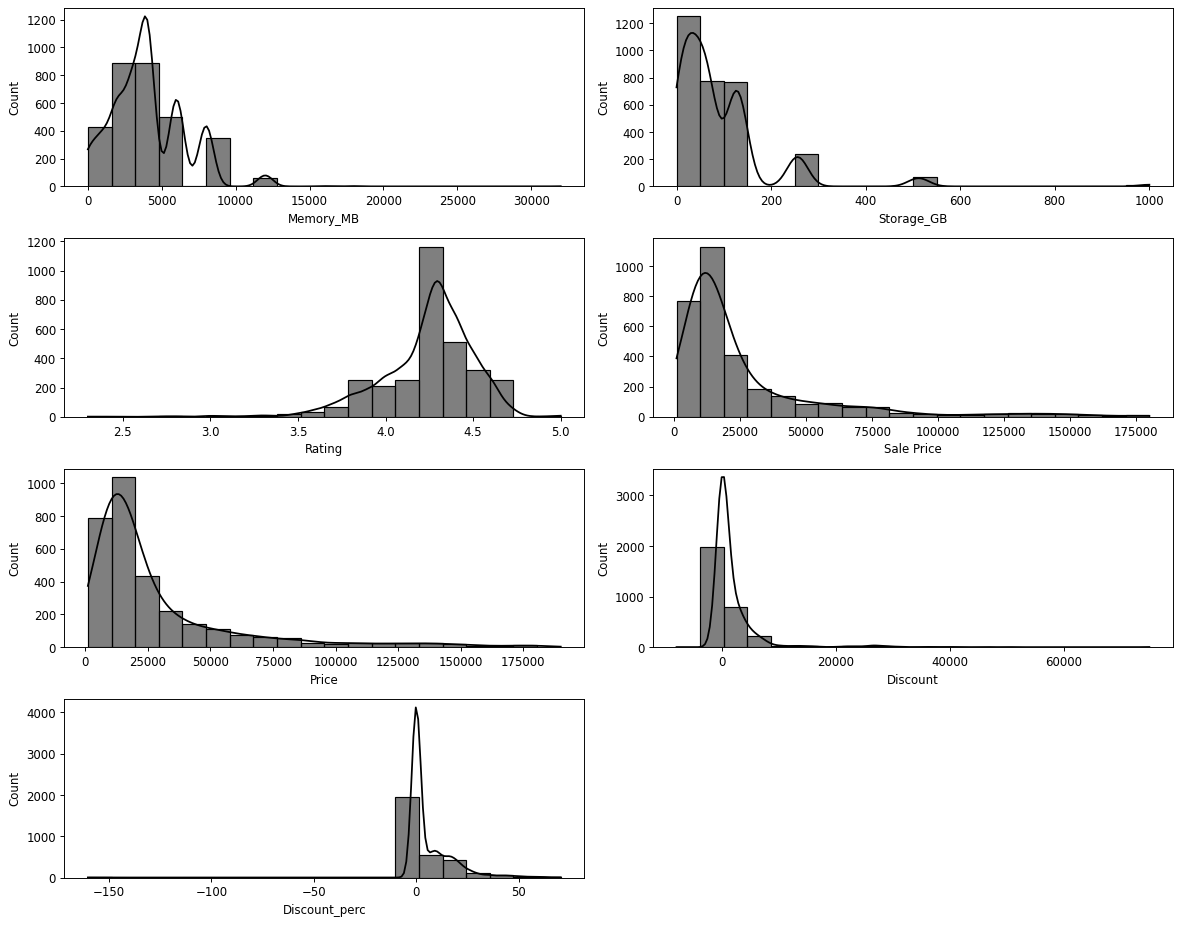

In [42]:
# show distribution 
numeric_features = mobile_df.select_dtypes(["float", "int"]).columns
nrows = (len(numeric_features) + 1) // 2
ncols = 2

# create subplot of histograms
fig, axes = plt.subplots(nrows, ncols, figsize=(14, 11), dpi=85)

axes = axes.flatten()

# plot histograms
for i, feature in enumerate(numeric_features):
  sns.histplot(mobile_df[feature], ax=axes[i], kde=True, bins=20, color="black")

# Remove any empty subplots (if the number of features is odd)
if len(numeric_features) % 2 != 0:
    fig.delaxes(axes[-1])  # delete the last empty plot

# Adjust layout
plt.tight_layout()
plt.show()
  

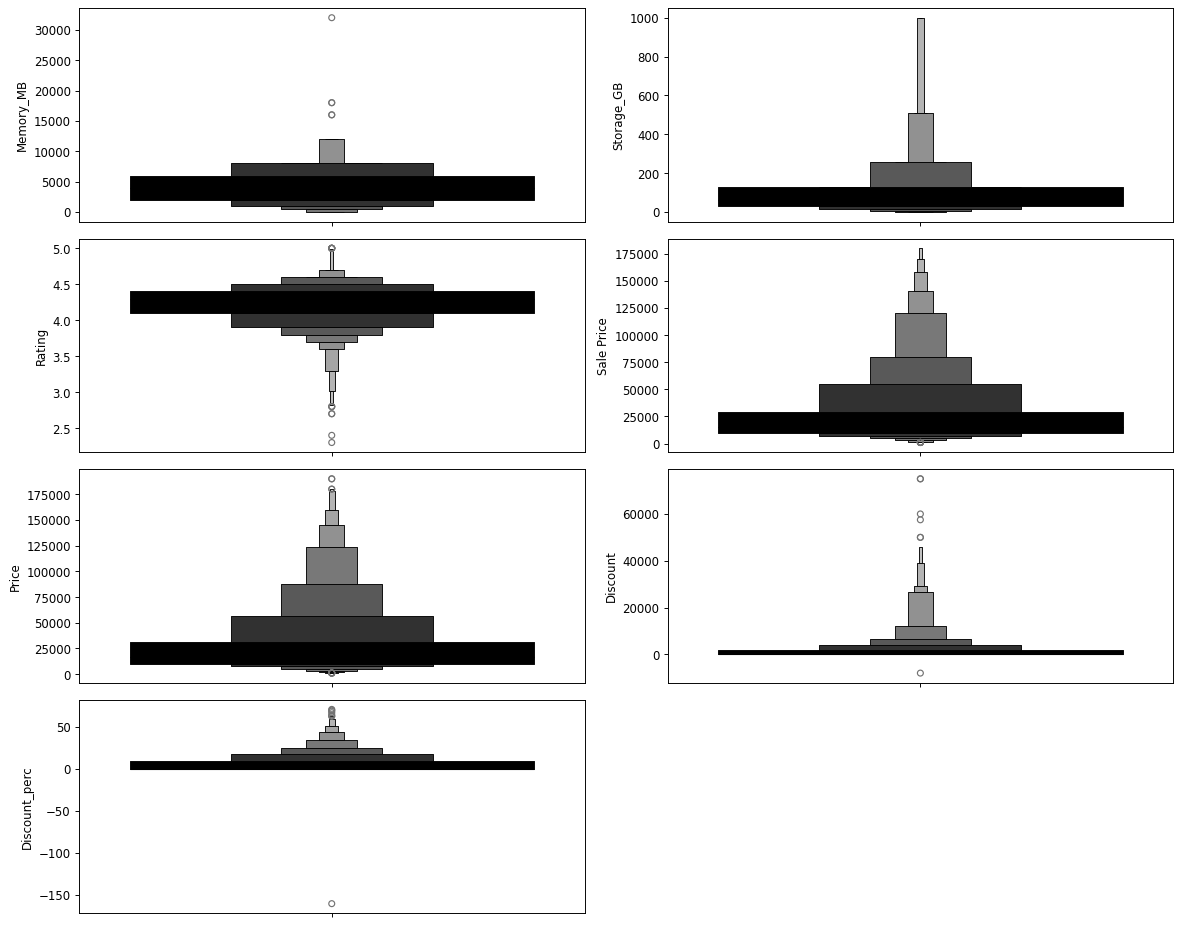

In [43]:
# check for outliers using boxplots
# show distribution 
numeric_features = mobile_df.select_dtypes(["float", "int"]).columns
nrows = (len(numeric_features) + 1) // 2
ncols = 2

# create subplot of histograms
fig, axes = plt.subplots(nrows, ncols, figsize=(14, 11), dpi=85)

axes = axes.flatten()

# plot histograms
for i, feature in enumerate(numeric_features):
  sns.boxenplot(mobile_df[feature], ax=axes[i], color="black")

# Remove any empty subplots (if the number of features is odd)
if len(numeric_features) % 2 != 0:
    fig.delaxes(axes[-1])  # delete the last empty plot

# Adjust layout
plt.tight_layout()
plt.show()
  

### Univariate Analysis on Categorical Variables

In [44]:
# understand features brands, models
mobile_df["Brands"].value_counts()

Brands
SAMSUNG         719
Apple           387
realme          327
OPPO            260
Nokia           213
Xiaomi          198
Infinix         151
GIONEE          129
vivo            124
Lenovo          121
ASUS            118
Motorola        105
LG               99
POCO             74
HTC              55
Google Pixel     29
IQOO              5
Name: count, dtype: int64

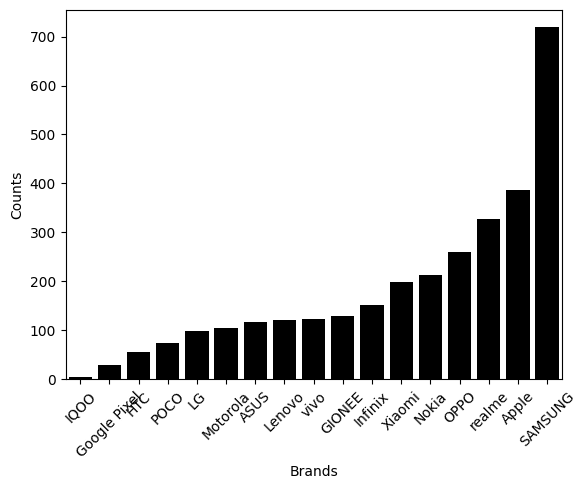

In [45]:
# visualise number of mobile phones per each brand
mobile_brands = mobile_df.groupby(["Brands"])[["Models"]].count().reset_index()
mobile_brands = mobile_brands.rename(columns={"Models":"Counts"})
mobile_brands = mobile_brands.sort_values(by=["Counts"], ascending=True)

sns.barplot(data=mobile_brands, x="Brands", y="Counts", color="black")
plt.xticks(rotation=45)
plt.show()

In [46]:
mobilecat_data = mobile_df.select_dtypes("object")
mobilecat_data

,Brands,Models,Colors,Camera,Mobile
0,SAMSUNG,GALAXY M31S,Mirage Black,Yes,SAMSUNG GALAXY M31S
1,Nokia,3.2,Steel,Yes,Nokia 3.2
2,realme,C2,Diamond Black,Yes,realme C2
3,Infinix,Note 5,Ice Blue,Yes,Infinix Note 5
4,Apple,iPhone 11,Black,Yes,Apple iPhone 11
...,...,...,...,...,...
3109,POCO,M4 Pro 5G,Cool Blue,Yes,POCO M4 Pro 5G
3110,Nokia,225,Black,Yes,Nokia 225
3111,Apple,iPhone SE,White,Yes,Apple iPhone SE
3112,Apple,iPhone 13 Pro,Gold,Yes,Apple iPhone 13 Pro


In [47]:
# show statistical summary
mobilecat_data.describe(include="object")

,Brands,Models,Colors,Camera,Mobile
count,3114,3114,3114,3114,3114
unique,17,914,639,1,928
top,SAMSUNG,iPhone 11,Black,Yes,Apple iPhone 11
freq,719,36,489,3114,36


## Multivariate Analysis

Verify relationship among features: numeric features

In [48]:
mobile_df

,Brands,Models,Colors,Camera,Mobile,Memory_MB,Storage_GB,Rating,Sale Price,Price,Discount,Discount_perc
0,SAMSUNG,GALAXY M31S,Mirage Black,Yes,SAMSUNG GALAXY M31S,8000.0,128.0,4.300000,19330,20999,1669,7.95
1,Nokia,3.2,Steel,Yes,Nokia 3.2,2000.0,16.0,3.800000,10199,10199,0,0.00
2,realme,C2,Diamond Black,Yes,realme C2,2000.0,1.0,4.400000,6999,7999,1000,12.50
3,Infinix,Note 5,Ice Blue,Yes,Infinix Note 5,4000.0,64.0,4.200000,12999,12999,0,0.00
4,Apple,iPhone 11,Black,Yes,Apple iPhone 11,4000.0,64.0,4.600000,49900,49900,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
3109,POCO,M4 Pro 5G,Cool Blue,Yes,POCO M4 Pro 5G,6000.0,128.0,4.400000,16999,19999,3000,15.00
3110,Nokia,225,Black,Yes,Nokia 225,0.0,32.0,3.600000,3499,3499,0,0.00
3111,Apple,iPhone SE,White,Yes,Apple iPhone SE,2000.0,128.0,4.500000,44900,44900,0,0.00
3112,Apple,iPhone 13 Pro,Gold,Yes,Apple iPhone 13 Pro,6000.0,128.0,4.243098,119900,119900,0,0.00


In [49]:
# create correlation analysis
def correlation_analysis():
  # create correlations among features
  mobile_num = mobile_df.select_dtypes(["float", "int"]).columns
  mobile_feat_corr = mobile_df[mobile_num].corr()

  # create heatmap --> show feature correlations
  plt.figure(figsize=(14,10))
  sns.heatmap(mobile_feat_corr, annot=True,  cmap=['black','grey', "silver", 'white'])
  plt.title("Correlation Map")

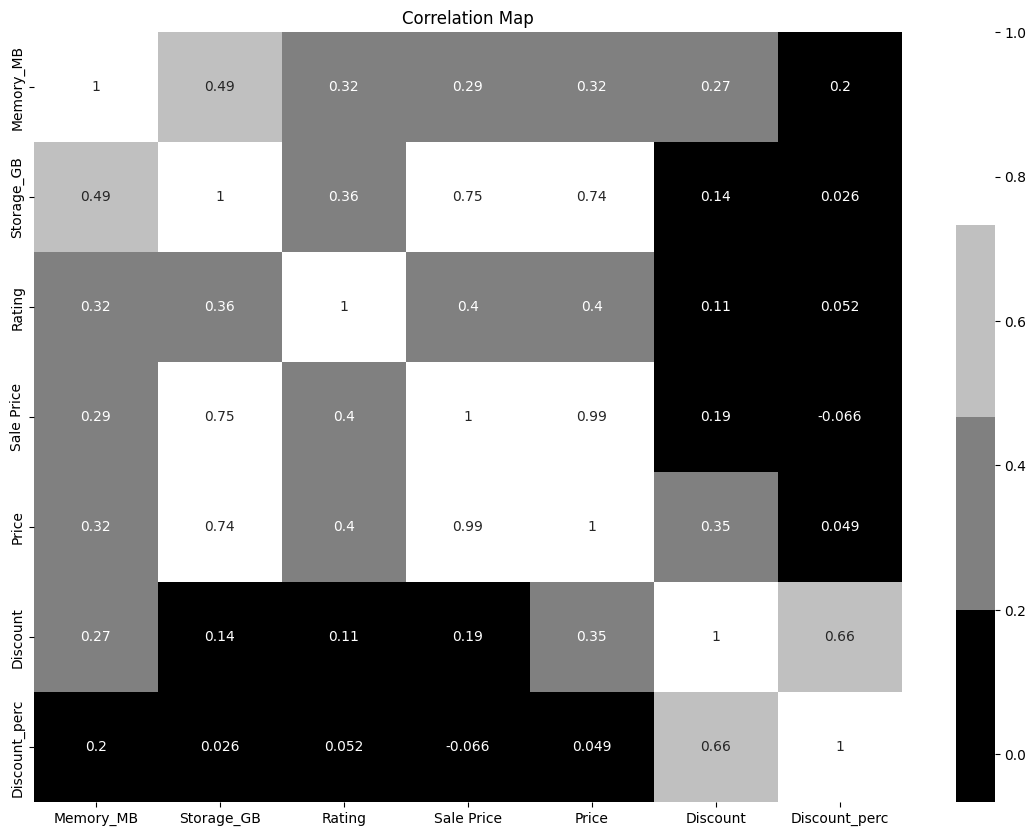

In [50]:
correlation_analysis()

+ Target: Price, Sale Price
+ Feature with: 
  + Strongest Correlation: Discount, Memory_MB, Storage_GB, Rating
  + Discount_perc

In [51]:
mobile_df.columns

Index(['Brands', 'Models', 'Colors', 'Camera', 'Mobile', 'Memory_MB',
       'Storage_GB', 'Rating', 'Sale Price', 'Price', 'Discount',
       'Discount_perc'],
      dtype='object')